In [33]:
import random as rn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
%matplotlib inline  
style.use('fivethirtyeight')
sns.set(style='whitegrid',color_codes=True)

In [34]:
X = np.load("dataset/data.npy")
labels = np.load("dataset/label.npy")

In [35]:
from sklearn.preprocessing import LabelEncoder
from keras.utils import to_categorical

labelEncoder = LabelEncoder()
y = labelEncoder.fit_transform(labels)
y = to_categorical(y, 10)

In [36]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score,confusion_matrix
from sklearn.model_selection import GridSearchCV
import tensorflow as tf

In [37]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

print("x_train shape: ", x_train.shape)
print("x_test shape: ", x_test.shape)
print("y_train shape: ", y_train.shape)
print("y_test shape: ", y_test.shape)

x_train shape:  (2500, 150, 150, 3)
x_test shape:  (626, 150, 150, 3)
y_train shape:  (2500, 10)
y_test shape:  (626, 10)


In [38]:
from keras.models import load_model
model = load_model("model_74.h5")

In [39]:
test_loss, test_acc = model.evaluate(x_test, y_test)

20/20 [==============================] - 2s 102ms/step - loss: 165.1683 - accuracy: 0.7748


In [40]:
# getting predictions on val set.
pred=model.predict(x_test)
pred_digits=np.argmax(pred, axis=1)

20/20 [==============================] - 2s 100ms/step


In [41]:

# now storing some properly as well as misclassified indexes'.
i=0
prop_class=[]
mis_class=[]

for i in range(len(y_test)):
    if(np.argmax(y_test[i])==pred_digits[i]):
        prop_class.append(i)
    if(len(prop_class)==8):
        break

i=0
for i in range(len(y_test)):
    if(not np.argmax(y_test[i])==pred_digits[i]):
        mis_class.append(i)
    if(len(mis_class)==8):
        break

correct_count = 0
for i in range(len(y_test)):
    if(np.argmax(y_test[i])==pred_digits[i]):   
        correct_count+=1

miss_count = 0
for i in range(len(y_test)):
    if(not np.argmax(y_test[i])==pred_digits[i]):   
        miss_count+=1

print(f"Correct Predictions: {correct_count}")
print(f"Wrong Predictions: {miss_count}")

Correct Predictions: 485
Wrong Predictions: 141


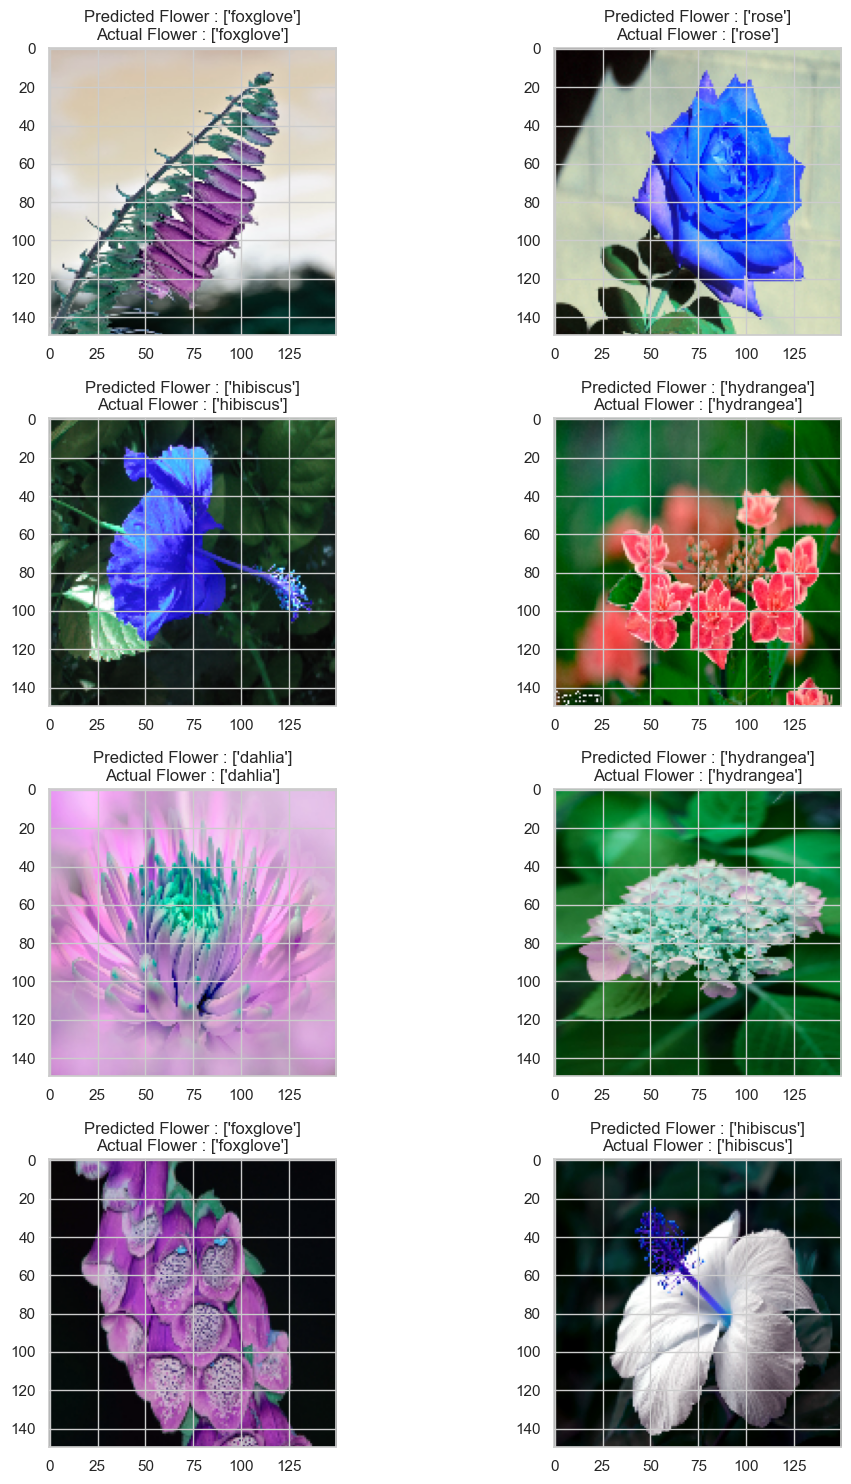

In [42]:
# Ignore  the warnings
import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

warnings.filterwarnings('always')
warnings.filterwarnings('ignore')


count=0
fig,ax=plt.subplots(4,2)
fig.set_size_inches(15,15)
for i in range (4):
    for j in range (2):
        ax[i,j].imshow(x_test[prop_class[count]])
        ax[i,j].set_title("Predicted Flower : "+str(labelEncoder.inverse_transform([pred_digits[prop_class[count]]]))+"\n"+"Actual Flower : "+str(labelEncoder.inverse_transform([np.argmax([y_test[prop_class[count]]])])))
        plt.tight_layout()
        count+=1

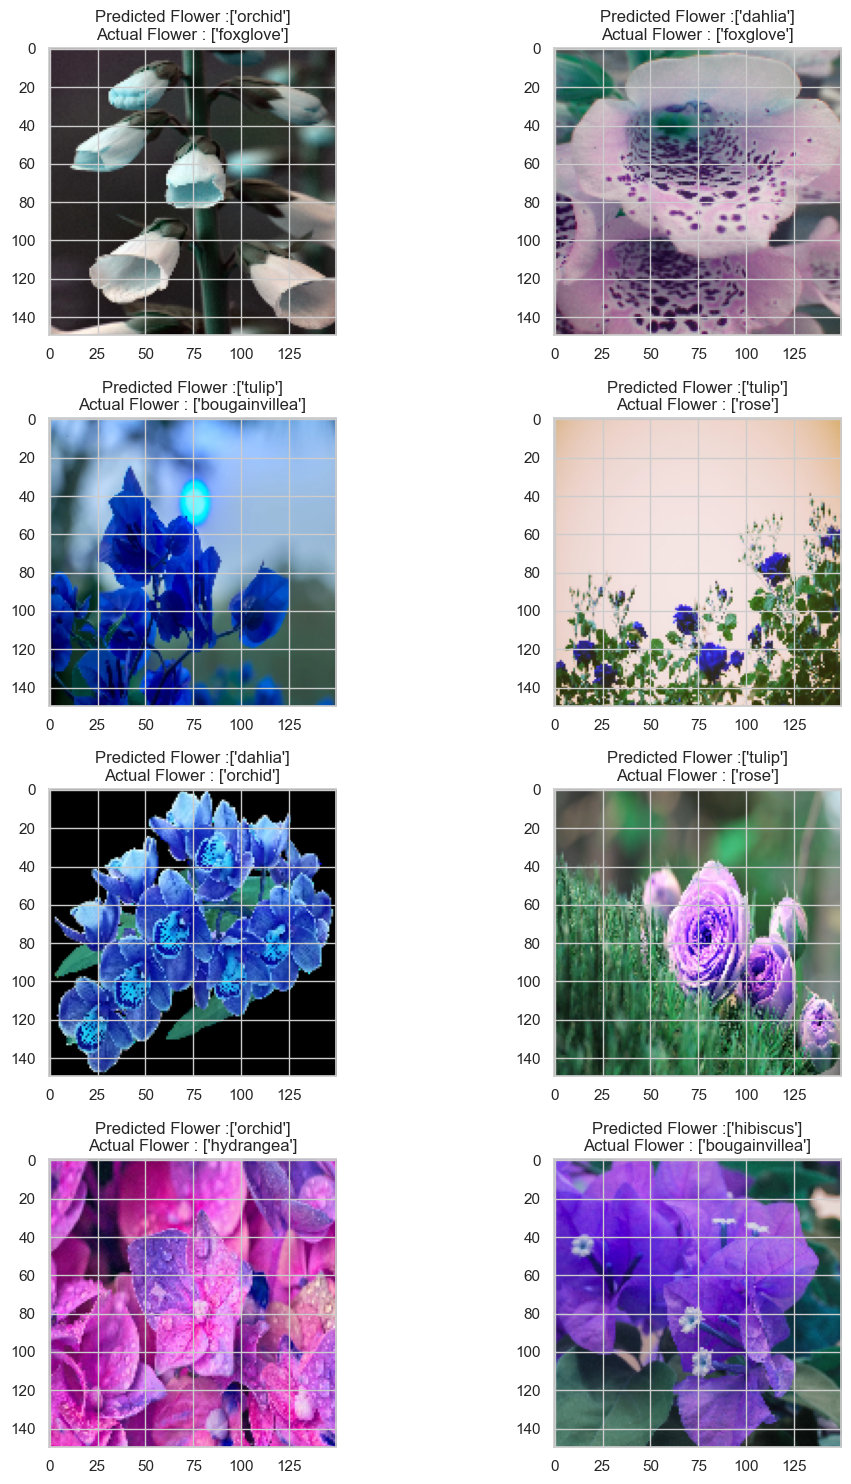

In [43]:
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

count=0
fig,ax=plt.subplots(4,2)
fig.set_size_inches(15,15)
for i in range (4):
    for j in range (2):
        ax[i,j].imshow(x_test[mis_class[count]])
        ax[i,j].set_title("Predicted Flower :"+str(labelEncoder.inverse_transform([pred_digits[mis_class[count]]]))+"\n"+"Actual Flower : "+str(labelEncoder.inverse_transform([np.argmax(y_test[mis_class[count]])])))
        plt.tight_layout()
        count+=1

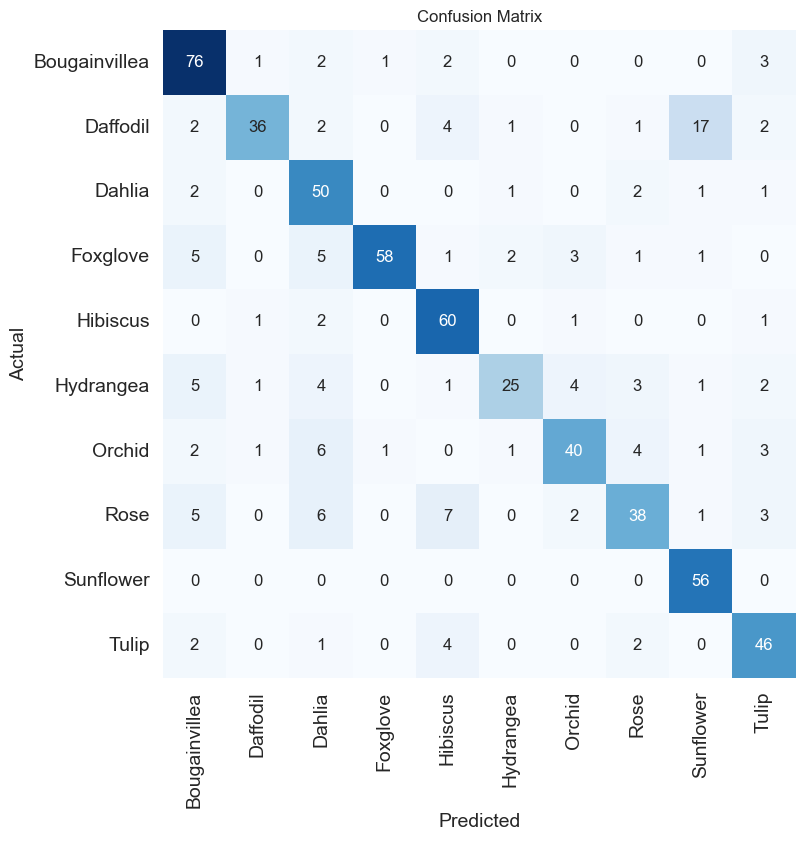

In [44]:
from sklearn.utils.multiclass import unique_labels
# Convert one-hot encoded labels to class indices
test_labels_indices = np.argmax(y_test, axis=1)
predictions_indices = np.argmax(pred, axis=1)

# Calculate the confusion matrix
cm = confusion_matrix(test_labels_indices, predictions_indices)

# Get class labels
classes =['Bougainvillea', 'Daffodil', 'Dahlia','Foxglove','Hibiscus','Hydrangea','Orchid','Rose','Sunflower','Tulip']

class_count = len(classes)
plt.figure(figsize=(16, 8))
plt.subplot(1, 2, 1)

sns.heatmap(cm, annot=True, vmin=0, fmt='g', cmap='Blues', cbar=False)
plt.xticks(np.arange(class_count) + .5, classes, rotation=90, fontsize=14)
plt.yticks(np.arange(class_count) + .5, classes, rotation=0, fontsize=14)
plt.xlabel("Predicted", fontsize=14)
plt.ylabel("Actual", fontsize=14)
plt.title("Confusion Matrix")
plt.savefig('cm77.png')
plt.show()

In [45]:
from sklearn.metrics import classification_report

print(classification_report(predictions_indices, test_labels_indices))

              precision    recall  f1-score   support

           0       0.89      0.77      0.83        99
           1       0.55      0.90      0.69        40
           2       0.88      0.64      0.74        78
           3       0.76      0.97      0.85        60
           4       0.92      0.76      0.83        79
           5       0.54      0.83      0.66        30
           6       0.68      0.80      0.73        50
           7       0.61      0.75      0.67        51
           8       1.00      0.72      0.84        78
           9       0.84      0.75      0.79        61

    accuracy                           0.77       626
   macro avg       0.77      0.79      0.76       626
weighted avg       0.81      0.77      0.78       626

